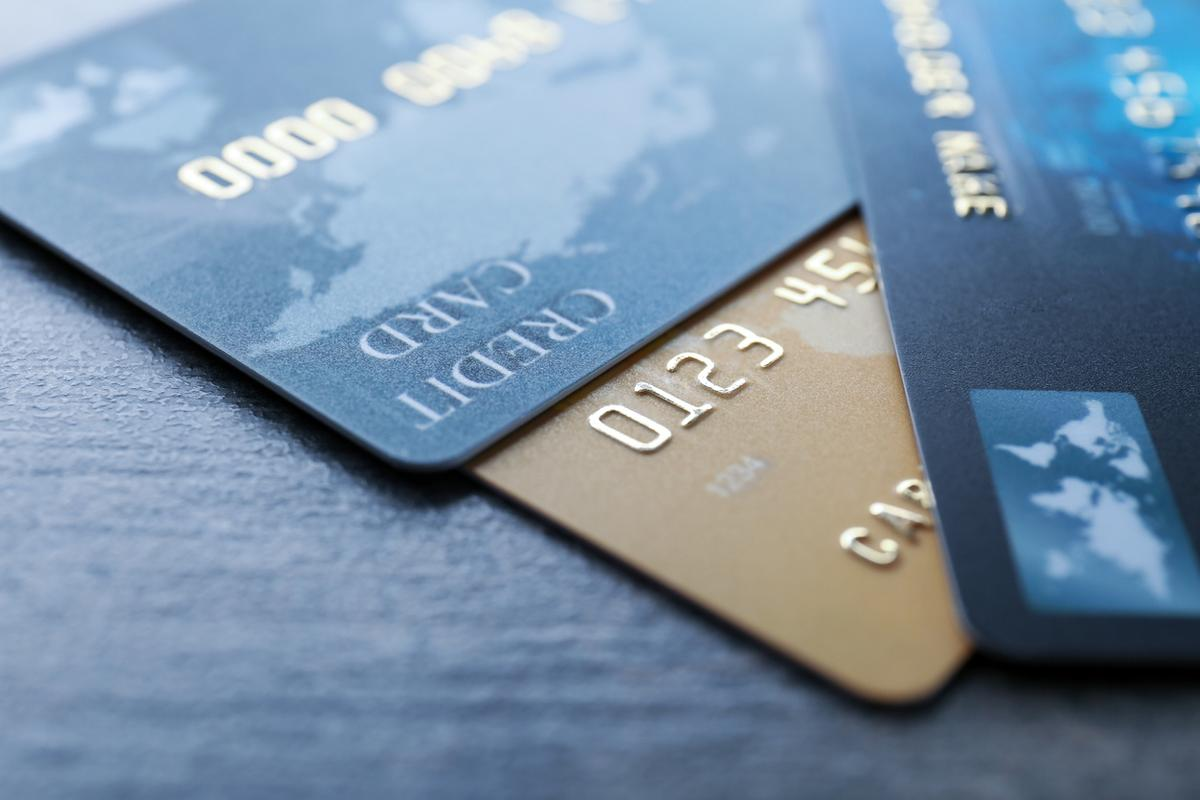

In [18]:
from IPython.display import Image
Image("../input/credit-card-image/are-credit-cards-the-same-in-the-us-and-canada.jpg")

### Motivation 

In this notebook I am going th explore some of the various machine learning models used for Anomaly detection. <br>

Anomaly detection is very important as it can be applied to detect fraud in a bank transcation , catching defects in a manufacturing product or even detect outliers in a dataset. <br> It can also be used for data labeling 

The challenging part in anomaly detection is that its dataset is higly unbalanced that is the anaomaly occurs around 1% of the total instances in the dataset. <br>

### Approach 

There could be three aproached for the given problem . 
* Treating as supervised learning problem : Fitting various models on the dataset to classify<br> 
* Treating as semi-supervised learning : Where you just map the correct data and any data points outside this domain are anomaly<br>
* Treating is a unsupervised learning : Where you try to isolate the fraud points from proper transaction without using labels <br>

Even though this dataset has labels but I am going to apply various anaomaly detection algorithms in this notebook and then via the help of the labels check out if I got all the anomalies correctly classified. 

### Dataset 

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.<br>

In [19]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import roc_curve, precision_recall_curve, auc,roc_auc_score,average_precision_score

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [20]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [21]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
df.shape

(284807, 31)

In [24]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [25]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

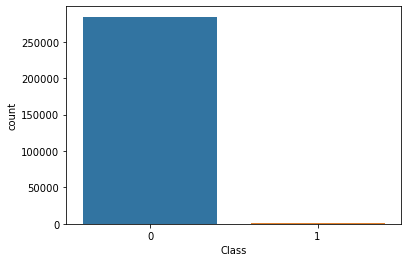

In [26]:
sns.countplot(data=df,x='Class');

#Highly unblanced class 

### Scaling the feature column

In [27]:
from sklearn.preprocessing import RobustScaler


col=[col for col in df.columns if col not in ['Time','Class']]

for i in col:
    sc=RobustScaler()
    df[i]=sc.fit_transform(df[i].values.reshape(-1,1))

X=df.drop(labels=['Time','Class'],axis=1)

In [28]:
# Lets visualize the dataset in 2D and see where the anamolies are 

from sklearn.decomposition import PCA 

pca=PCA(n_components=2)
X2D=pca.fit_transform(X)

X2D=pd.DataFrame(X2D,columns=['pca1','pca2'])

X2D['Class']=df['Class']

#The Explained vairance ratio is pretty low in 2 dimension and I assume this is because the dataset has already PCA 
#perfromed for anonymization

print(pca.explained_variance_ratio_)

[0.2327403  0.10483706]


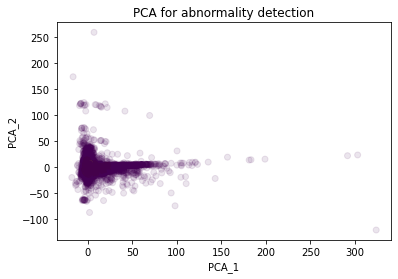

In [29]:
samp=X2D.sample(frac=1)

plt.scatter(samp['pca1'],samp['pca2'],c=samp['Class'],alpha=0.1);
plt.title('PCA for abnormality detection');
plt.xlabel('PCA_1');
plt.ylabel('PCA_2');

So there is no clear region where we can see the Fraud points in 2 dimension 

Lets visualize the same graph in 3D to for some extra prespestive 

In [30]:
from sklearn.decomposition import PCA 

pca=PCA(n_components=3)
X3D=pca.fit_transform(X)

X3D=pd.DataFrame(X3D,columns=['pca1','pca2','pca3'])
X3D['Class']=df['Class']

# We can change the frac value to reduce the points plotted 
samp=X3D.sample(frac=0.02)

In [31]:
import plotly.express as px
fig = px.scatter_3d(samp, x='pca1', y='pca2', z='pca3',
              color='Class')
fig.show()

We do see a small patch of anomaly but there are not well seperated with lot of overlap with normal points 

For using the Gaussian Mixture algorithm we need to provide the number of cluster . So I computed the AIC and BIC scores to see what's the clusted number which minimizes score but I could not spot a clear minimum value and the score kept on dropping as I increased the cluster to 20 . 

Just taking a clue from slope change and computation hardware limitation I have settled on 10 cluster .Uncomment the below cell and increase the upper limit number to see the effect 

In [32]:

from sklearn.mixture import GaussianMixture

#bic=[]
#aic=[]

#for component in np.arange(2,20):

 #   gm=GaussianMixture(n_components=component,n_init=10,covariance_type='spherical')

  #  gm.fit(X)
   # bic.append(gm.bic(X))
    #aic.append(gm.aic(X))


#sns.lineplot(x=np.arange(2,20),y=bic,markers=True)
#sns.lineplot(x=np.arange(2,20),y=aic,markers=True)

In [33]:
# So in the GM model when we do score_sample we get the log of PDF for each instance . Higher values means the point is located 
#in a higher density region by and setting the threshold at 10 percentile we return all points below that thereshold value or
#return points in lowest 10% density 

gm=GaussianMixture(n_components=10,n_init=10,covariance_type='spherical')

gm.fit(X)

densities=gm.score_samples(X)
density_threshold=np.percentile(densities,10)

In [34]:
df['Gm_predict']=0

df.loc[df[densities<density_threshold].index,'Gm_predict']=1

In [35]:
# So we where able to identify 446 anomaly points out of 492 in the original dataset. Also we have kept 
#the threshold value a bit higher to so we will catch a lot of False positive as well. 

df[(df['Class']==1) & (df['Gm_predict']==1)].shape

(443, 32)

### Scoring the Models 

For imbalance dataset we should consider the Area Under the Receiver Operating Characteristic Curve (AUC) and area under precision-recall curve(AUCPR). For AUC the baseline is 0.5 which is random guessing and perfect model is 1 . Similary the AUCPR the perfect model score is 1 and the baseline score is the relative count of the positive class so for this dataset 0.00172


In [37]:
print('AUC score is {}'.format(roc_auc_score(df['Class'],-1*gm.score_samples(X))))
print('AUCPR score is {}'.format(average_precision_score(df['Class'],-1*gm.score_samples(X))))

AUC score is 0.9454164473762283
AUCPR score is 0.05305672404499223


### Lets check out the algorithm Isloation Forest 

The below model was tried with different values estimators,contimination and max_sample sizes . We are casting the 
contamination higher than 0.001% which the valued from our dataset and accourding to the above EDA we know many anaomaly points are overlapping the good points so as to capture them we need to flag more data as fraud 

In [39]:
from sklearn.ensemble import IsolationForest

IF=IsolationForest(n_estimators=100,n_jobs=-1,contamination=0.1,random_state=7,max_samples=0.25)

df['isolation_forest_predict']=IF.fit_predict(X)

df['isolation_forest_predict'].replace({1:0,-1:1},inplace=True)

In [40]:
df['isolation_forest_predict'].value_counts()

0    256326
1     28481
Name: isolation_forest_predict, dtype: int64

In [41]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [42]:
# So we where able to identify 444 anomaly points out of 492 in the original dataset. Also we have kept 
#the threshold value a bit higher to so we will catch a lot of False positive as well. 

df[(df['Class']==1) & (df['isolation_forest_predict']==1)].shape

(444, 33)

In [43]:
df['score_sample_IF']=IF.score_samples(X)*-1

In [44]:
print('AUC score is {}'.format(roc_auc_score(df['Class'],-1*IF.score_samples(X))))
print('AUCPR score is {}'.format(average_precision_score(df['Class'],-1*IF.score_samples(X))))

AUC score is 0.9537683426532664
AUCPR score is 0.23291906450252595


## Please Upvote if you like . Comment below for any issues 